![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/visual-nlp/1.4.Handwritten_Text_Recognition.ipynb)

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

For get the trial license please go to:

https://www.johnsnowlabs.com/install/

Please choose GPU runtime

### Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
!pip install -q johnsnowlabs

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, visual

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.settings.enforce_versions=True
nlp.install(refresh_install=True, visual=True)

In [ ]:
import pkg_resources
import pandas as pd
from pyspark.ml import PipelineModel
from pyspark.sql import functions as F

In [ ]:
# Automatically load license data and start a session with all jars user has access to
spark = nlp.start(visual=True)

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_9005.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.3.1, 💊Spark-Healthcare==5.3.0, 🕶Spark-OCR==5.3.0, running on ⚡ PySpark==3.4.0


## Read image

In [ ]:
!wget -q https://github.com/JohnSnowLabs/spark-nlp-workshop/raw/master/visual-nlp/data/handwritten_example.jpg

In [ ]:
image_example_df = spark.read.format("binaryFile").load("handwritten_example.jpg")
image_df = visual.BinaryToImage().transform(image_example_df).cache()

visual.display_images(image_df)

In [ ]:
from sparkocr.transformers import *

In [ ]:
binary_to_image = visual.BinaryToImage()
#binary_to_image.setImageType(ImageType.TYPE_3BYTE_BGR)

text_detector = visual.ImageTextDetectorV2 \
    .pretrained("image_text_detector_v2", "en", "clinical/ocr") \
    .setInputCol("image") \
    .setOutputCol("text_regions") \
    .setWithRefiner(True) \
    .setSizeThreshold(10) \
    .setScoreThreshold(0.2) \
    .setTextThreshold(0.2) \
    .setLinkThreshold(0.3) \
    .setWidth(500)

ocr = ImageToTextV2.pretrained("ocr_base_handwritten_v2_opt", "en", "clinical/ocr") \
    .setRegionsColumn("text_regions")\
    .setInputCols(["image"]) \
    .setGroupImages(True) \
    .setOutputCol("text")

draw_regions = visual.ImageDrawRegions() \
    .setInputCol("image") \
    .setInputRegionsCol("text_regions") \
    .setOutputCol("image_with_regions") \
    .setRectColor(visual.Color.green) \
    .setRotated(True)

pipeline = PipelineModel(stages=[
    binary_to_image,
    text_detector,
    ocr,
    draw_regions
])

image_text_detector_v2 download started this may take some time.
Approximate size to download 75.3 MB


## Run pipeline and show results


    Image #0:
    Origin: file:/content/handwritten_example.jpg
    Resolution: 0 dpi
    Width: 4608 px
    Height: 3456 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


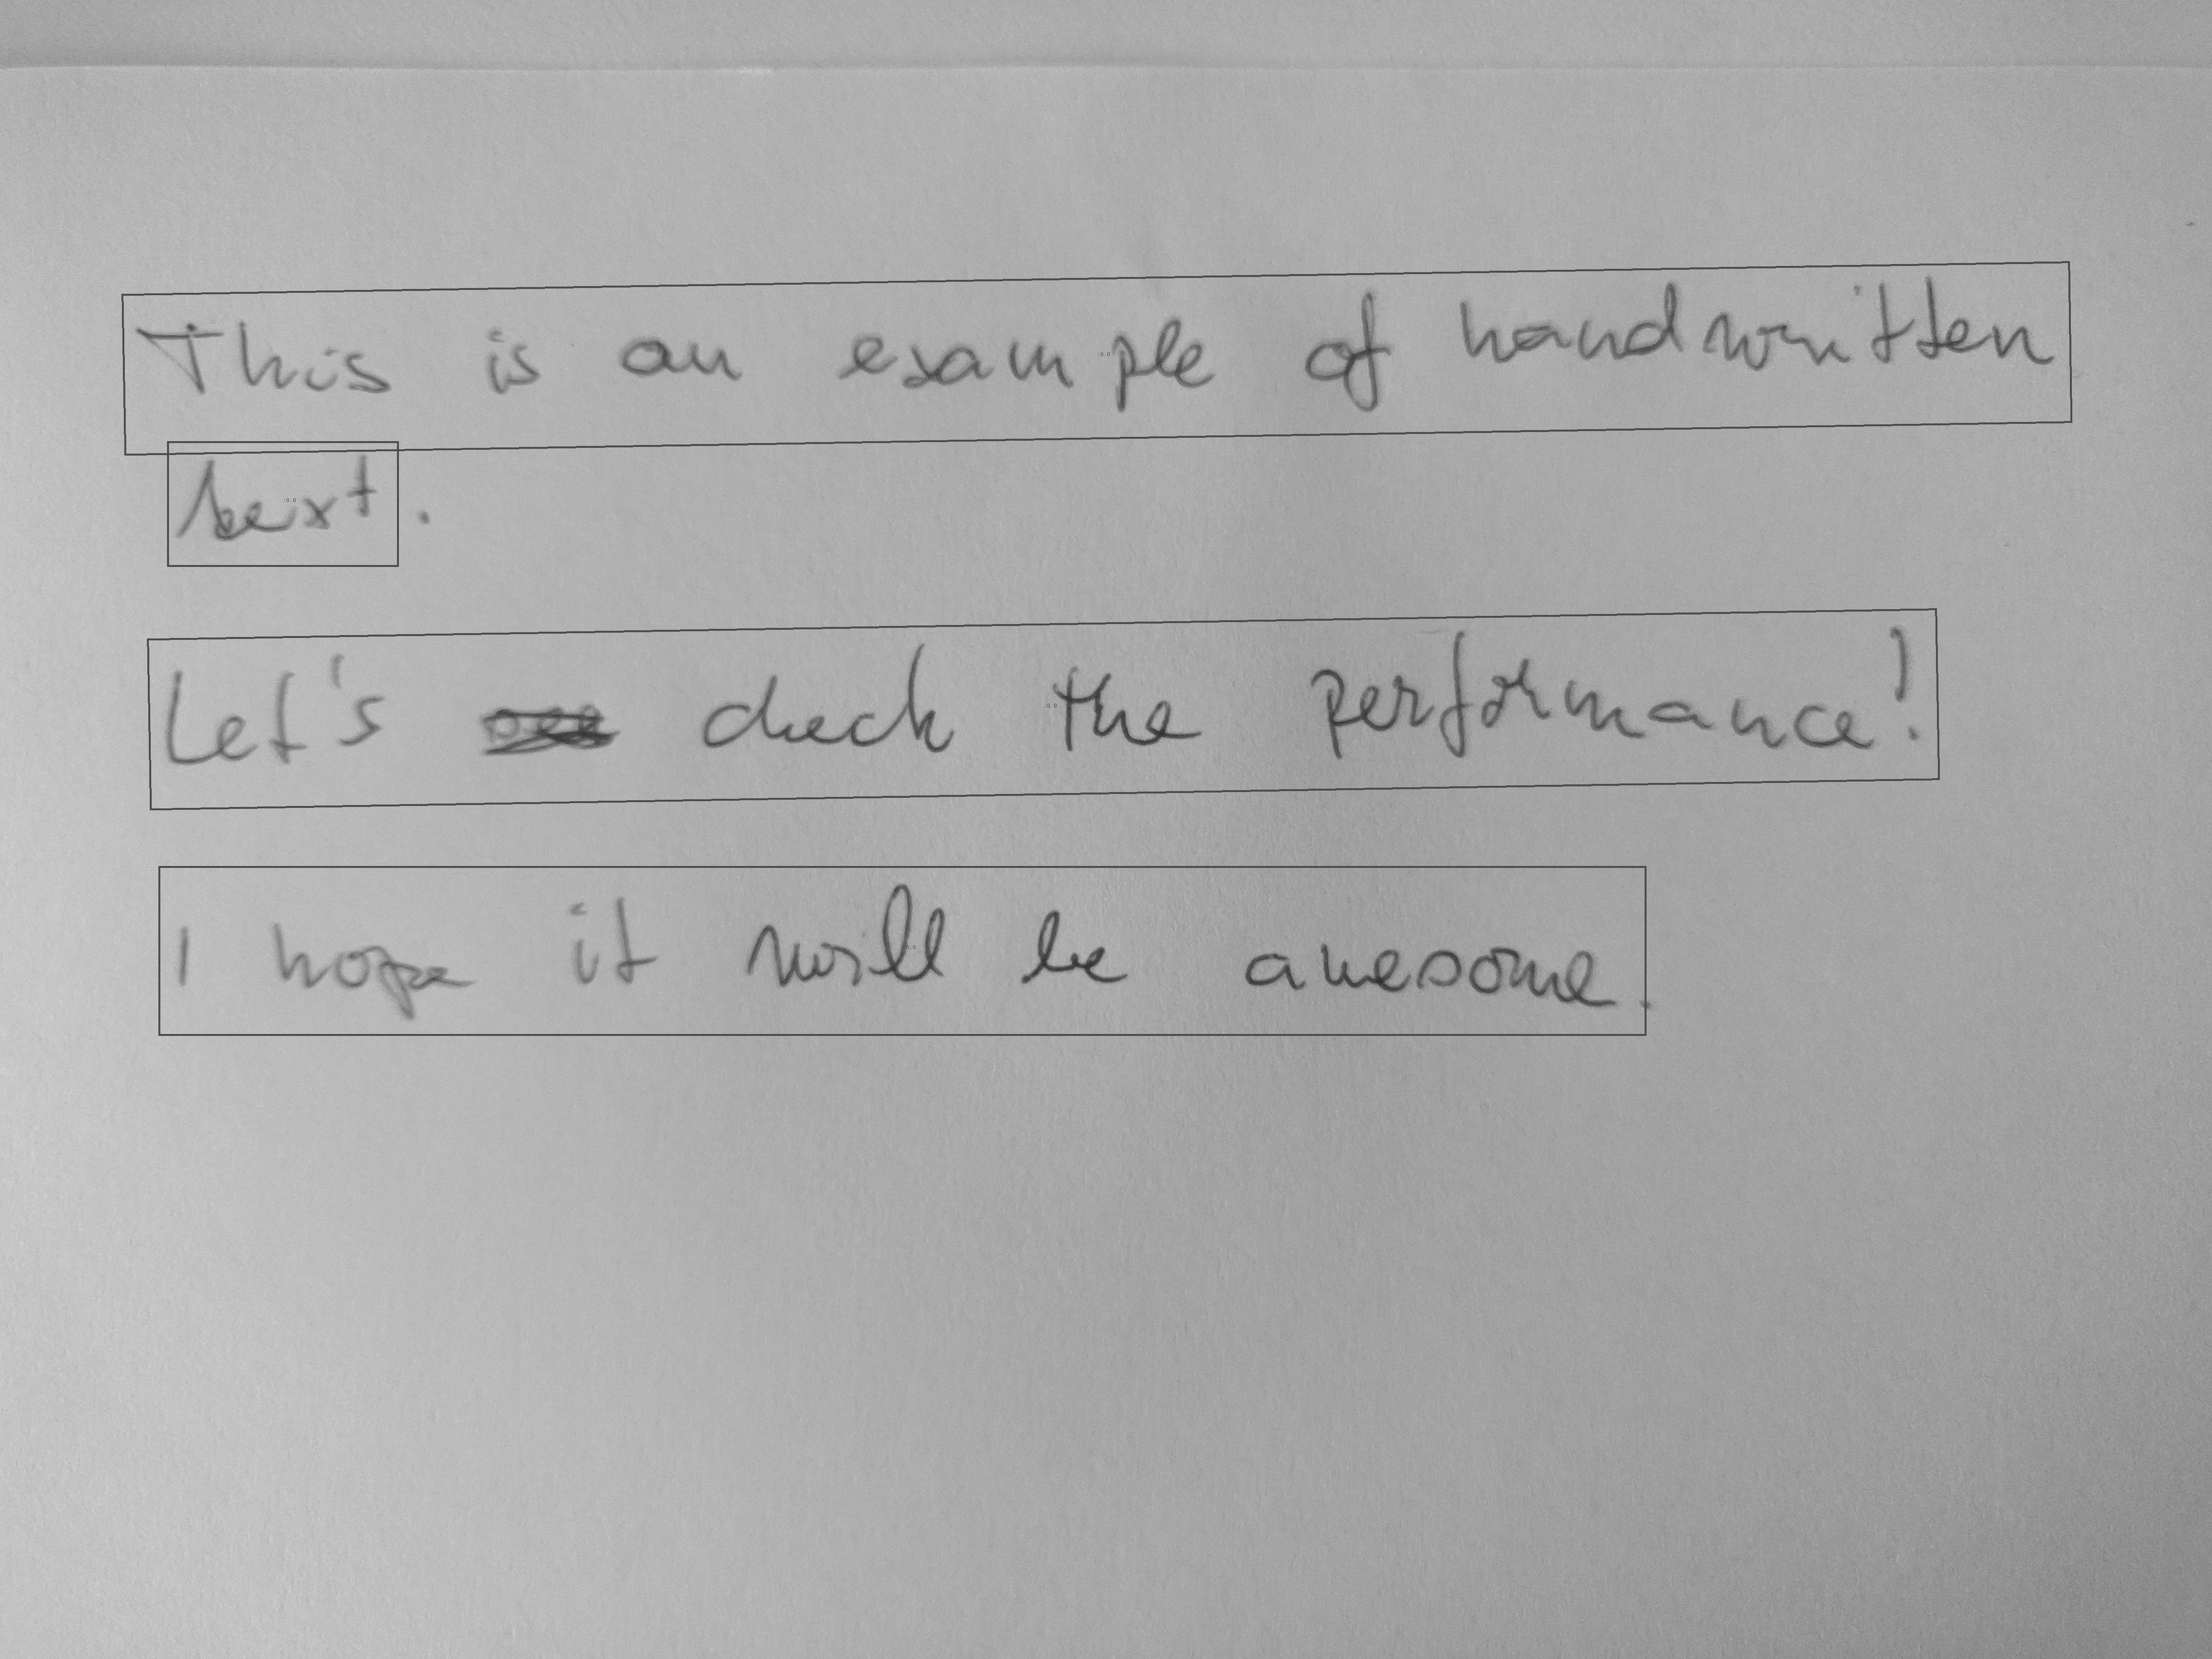

This is an example of handwritten
beekt .
Let's # check the performance !
I hope it will be awesome


In [ ]:
result = pipeline.transform(image_example_df).cache()
visual.display_images(result, "image_with_regions")
print(("").join([x.text for x in result.select("text").collect()]))